# Проверка статистических гипотез.Часть 1

Сегодня мы начнем говорить о сплит-тестировании и его статистических основах.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# На этом занятии
* Статистическая гипотеза.Определение;
* Этапы проверки статистических гипотез;
* Ошибки первого и второго рода;
* Уровень значимости;
* Статистические критерии
* Параметрические критерии и непараметрические критерии;
* Сравнение долей

# 1 Статистическая гипотеза. Определение

![mem](https://i.pinimg.com/564x/ea/74/2d/ea742de6dc014987b153a8accae41342.jpg)

**Статистическая гипотеза** - это некоторое предположение о свойствах генеральной совокупности, которое необходимо проверить. Статистические гипотезы выдвигаются, когда необходимо проверить, является ли наблюдаемое явление элементом случайности или результатом воздействия некоторых наших действий. Например:
* средний чек вырос просто так или потому что добавили рекомендацию сопутствующих товаров:
* конверсия в поездку сама стала выше или сработало отображение какой-либо дополнительной информации на экране
* и так далее

**Суть проверки статистических гипотез** - проверить, имеет ли изменение статистическую значимость в рамках заданных нами параметров. Так как когда мы имеем дело с продуктом, которым пользуются миллионы клиентов, которые в свою очередь генерируют миллионы действий в нашем приложении, принимать решения становится все сложнее, так как любое изменение может привести к серьезным последствиям для наших клиентов, нашего продукта и бизнес показателей.

Но чем больше у вашего бизнеса клиентов, то есть чем больше объем выборки, тем более разнообразный математический (статистический) функционал вы можете использовать при обработке результатов ваших тестов.

**Важно** если мы проверили определенную гипотезу,например, что новый формат изменения способа оплата на экране оформления заказа влияет на конверсию в оплату и получили радостный положительный результат, как бы сильно нам не хотелось, мы не можем сразу увериться в том, что это изменение починит много наших болей, так как вероятность влияния других факторов никуда не пропадает. Старайтесь смотреть сопутствующие конверсии,например, как обстояла ситуация со сменой способа оплаты,на каком моменте пользователи отваливались и как это изменилось и так далее. 

# 2 Нулевая и альтернативная гипотезы

![m](https://i.pinimg.com/564x/b4/fe/fa/b4fefa48bf3617510e15c3e94a8b11eb.jpg)

**Первым этапом проверки** любой гипотезы,что логично, является ее формулировка. Мы всегда имеем основную гипотезу H0 и конкурирующую(альтернативную) - H1.

* Гипотезу, утверждающую, что различие между
сравниваемыми характеристиками отсутствует, а
наблюдаемые отклонения объясняются лишь
случайными колебаниями в выборках, на основании
которых производится сравнение, называют
**нулевой (основной) гипотезой (Н0
)**.
* Наряду с основной гипотезой рассматривают и
**альтернативную (конкурирующую,
противоречащую) ей гипотезу Н1**.И если мы не можем принять нулевую гипотезу, то будет иметь место
альтернативная гипотеза.

**Важно** нулевой гипотезой всегда называют предположение об отсутствии различий (равенстве) всегда, независимо от того, что мы проверяем. И важно не ошибиться. 
* 1) мы проверяем наличие различий между двумя выборками, нулевая гипотеза утвержает что выбранный параметр в выборках,например,среднее не отличается значимо;
* 2) мы проверяем, что распределение подчиняется нормальному закону распределения (используем критерий согласия), в данном случае нулевая гипотеза опять же говорит нам о том, что разницы между законом распределения нашей выборки и между значениями нормального распределения нет. Таким образом, нулевая гипотеза не злой антагонист, который всегда оспаривает наши утверждения, нулевая гипотеза это ВСЕГДА гипотеза о равенстве

**Например**

![m](https://i.pinimg.com/originals/b8/8d/95/b88d95b69e0ba270d5cc719099125e95.png)

# 3 Ошибки первого и второго рода

Проверяя гипотезы, мы работаем с выборками, а значит всегда допускаем, что можем совершить ошибку и принять неверное предположение или не заметить значимого различия. 
<br>**Какие бывают ошибки и почему перед каждым сплит-тестированием мы должны продумать,какую из них нам критичнее не допускать и почему слишком большой и слишком маленький уровень значимости - плохо.**

![errors](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1ce6-OOtY2aN10Z60e5WlI3e7SE457EjKLJ79_DeiRMiL0bVZ&usqp=CAU)

* **Ошибка первого рода** - нулевую гипотезу отвергают, когда она истинна, и делают вывод, что имеется эффект, когда в действительности его нет.

Ошибку первого рода контролирует исследователь. Принято считать, что нулевая гипотеза соответствует состоянию «по умолчанию» (естественному, наиболее ожидаемому положению вещей, например что средние чеки в двух группах пользователей не имеют отличия, что конечно не всегда радует команду того или иного продукта, которые хотят повлиять на этот показатель. Но все зависит от предметной области и специфики эксперимента,например,если средний чек в тестовой группе ниже и разница значима, то это явно хуже, чем отсутствие разницы.  Соответственно, альтернативная гипотеза обозначает противоположную ситуацию, которая обычно трактуется как менее вероятная, неординарная.

С учётом вышесказанного, ошибку первого рода часто называют ложной тревогой, ложным срабатыванием или ложноположительным срабатыванием. Слово «ложноположительный» в данном случае не имеет отношения к желательности или нежелательности самого события.
Максимальный шанс (вероятность) допустить ошибку 1-го рода обозначается α (альфа). Это уровень значимости критерия. Нулевую гипотезу отвергают, если наше значение p ниже уровня значимости, т. е., если p < α. И таким образом, шанс допустить ошибку 1-го рода никогда не превысит выбранного уровня значимости, скажем α = 0,05, так как нулевую гипотезу отвергают только тогда, когда p < 0,05. Если обнаружено, что p >= 0,05, то нулевую гипотезу не отвергнут и, следовательно, не допустят ошибки 1-го рода.

* **Ошибка 2-го рода**: не отвергают нулевую гипотезу, когда она ложна, и делают вывод, что нет эффекта, тогда как в действительности он существует. Шанс возникновения ошибки 2-го рода обозначается β (бета); а величина (1-β) называется мощностью критерия.

Таким образом, вероятность правильного не отвержения гипотезы Н0 будет равна 1-α (эта вероятность называется доверительной вероятностью), а вероятность правильного принятия гипотезы Н1 будет равна 1-β (эта вероятность называется мощностью или чувствительностью критерия, характеризуя его способность отклонять Н0, когда она не верна).
   * ***Оптимальная величина α (критический уровень значимости) должна удовлетворять двум противоречивым требованиям***:
  * 1) она должна быть достаточно мала, чтобы обеспечить высокое доверие к выводу об отклонении Н0;
  * 2) но она должна быть достаточно велика, чтобы реже допускать ошибки 2-го рода.

**Уровень значимости должен стремиться к нулю, а мощность критерия к 1.**

К ошибкам еще вернемся, обсудив уровень значимости))

# 4 Уровень статистической значимости 

## 4.1 Определение

Мы уже выяснили, что можем совершить ошибку при проверке гипотезы, поэтому должны быть внимательны при оценке результатов проведения эксперимента. Как же принять решение о наличии статистически значимой разницы?

Граница между принятием и не принятием нулевой гипотезы базируется на понятии уровня значимости.

**Уровень значимости** - вероятность ошибочного отклонения нулевой гипотезы или иными словами, вероятность совершения ошибки первого рода. Конечно, мы берем не саму вероятность, а задаем фиксированное число, которую наша наша вероятность не должна превышать.
Всем известные значения уровня значимости, равные 0.05,0.01 и 0.001 - это стандартные уровни статистической значимости, используемые аналитиками при проверке гипотез.
Иначе говоря, уровень значимости – это наименьшее значение вероятности отказа от справедливой гипотезы, для которого вычисленная проверочная статистика ведет к отказу от нулевой гипотезы. 

Например, мы проверяем гипотезу о влиянии явного отображения скидки на конверсию в заказ и задаем уровень значимости, равный 0.05, то мы указываем, что вероятность совершения ошибки первого рода, то есть обнаружения значимого влияния отображения скидки на конверсию в заказ,хотя на самом деле ее нет, не должна превышать 0.05. 

**Мы разобрались с тем,что же такое уровень значимости, но что же такое p-value? тоже самое?**

![h](https://i.pinimg.com/originals/ce/99/bc/ce99bc1d95ca30f1b9f0da2f5a6698ec.png)

## 4.2 Критическая область

Начнем с введения такого определения как **критическая область** - область значений статистики критерия, при которых отвергается H0. А критические значения - это граница критической области. Проще говоря, критическая область и граница определяют с какого момента мы будем отвергать нулевую гипотезу.Например, область, где критическое значение превышено с вероятностью α если нулевая гипотеза верна. Нулевая гипотеза отклоняется, если тестовая статистика лежит в этой области, которая часто упоминается как область (ы) отклонения.

Критическая область может быть:
* правосторонней;
* левосторонней;
* двусторонней

Представим, что мы хотим проверить гипотезу о различии среднего чека за определенный период в двух группах клиентов, первую группу мы не трогали, а вторую донимали пушами (график ниже). То, как мы сформулируем свою альтернативную гипотезу, будет определять с какой критической областью мы имеем дело.

In [2]:
ex_1 = np.random.normal(1000,100,10000)
ex_2 = np.random.normal(900,70,10000)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

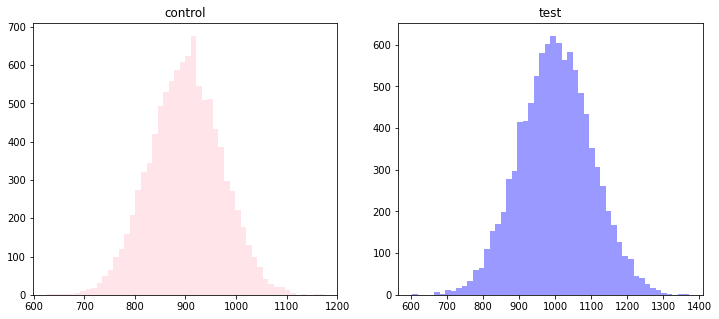

In [3]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(ex_2,color = 'pink',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(ex_1,color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title('test')

### 4.2.1 Двусторонняя критическая область

Первый вариант, который применяется чаще всего, это сформулировать гипотезы следующим образом:
* H0 = Средней чек тестовой группы равен среднему чекy контрольной группы
* H1 = Средний чек тествой группы не равен среднему чеку контрольной группы
* **Таким образом, мы проверяем лишь наличие разницы, не утверждая что какой-то вариант имеет более высокий средний чек. То мы опровергнем нулевую гипотезу в двух случаях: средний чек тестовой группы выше чем средний чек контрольный группы или средний чек тестовой группы меньше чем средний чек контрольной группы**

Так как мы работаем со средним, логично что мы можем рассмотреть разность наших средних значений, которая в данном случае будет выступать в качестве **статистики критерия** -некоторой функция от исходных данных, по значению которой проверяется нулевая гипотеза. 

Давайте для академического примера используем свой критерий - просто разницу чеков)

In [4]:
mu = np.mean(ex_1 - ex_2)

In [5]:
mu

100.70079419596757

Как и любая величина, статистика критерия каким-либо образом распределяется

In [6]:
diff = ex_1 - ex_2

<AxesSubplot:>

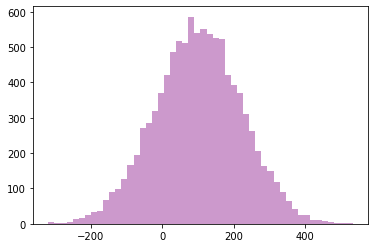

In [7]:
sns.distplot(diff,color = 'purple',hist = True, kde = False)

Так вот в нашем случае, критической областью будут значения разности между средними при которых мы отклоняем нулевую гипотезу, то есть значения, при которых средние наших выборок уже не равны.

А так как мы допускаем, что среднее значение может быть больше или меньше в любой из выборок, то логично критические области будут присутствовать с обеих сторон распределения разностей средних. Схематично критические области можем обозначит как ра рисунке ниже.

![both](https://i.pinimg.com/originals/33/46/f8/3346f8ce57ced566cd4e0d6c34dd1312.png)

Мы начнем отклонять нулевую гипотезу как только значение разности приблизится к границе критической области с обеих сторон (первому значению,которое приведет к неравенству средних значений).

### 4.2.2  Правосторонняя критическая область

Если мы имеем дело с правосторонней альтернативной гипотизой, и как из этого следует, правосторонней критической областью, то нулевая и альтернативная гипотезы будут звучать следующим образом:
* H0 - нет значимой разницы между значениями средних чеков в группах;
* H1 - средний чек в тестовой группе больше чем в контрольной группе

**То есть нас волнует не сам факт наличия различия, а конкретное различие - более высокое значение среднего чека в тестовой группе**

Распределение разности, что логично, будет иметь тот же вид, однако теперь нас будет интересовать только правый хвост нашего распределения разности средних, так как нас интересует больше ли значение среднего в тестовой группе.

![right](https://i.pinimg.com/originals/ac/84/07/ac840782a22e1da89083afd284e0686e.png)

### 4.2.3 Левосторонняя критическая область

По аналогии,если мы имеем дело с левосторонней критической областью, то нулевая и альтернативная гипотезы будут звучать следующим образом:

* H0 - нет значимой разницы между значениями средних чеков в группах;
* H1 - средний чек в тестовой группе меньше чем в контрольной группе
* **В данном случае, нас волнует различие, когда средний чек в тестовой группе оказался ниже,чем в контрольной**

![left](https://i.pinimg.com/originals/ef/49/f4/ef49f4916a0ea97cb351ff17fefc191e.png)

### 4.2.4 И как это связано с p-value?

Давайте вспомним наши распределения и ответим себе на несколько вопросов

Text(0.5, 1.0, 'test')

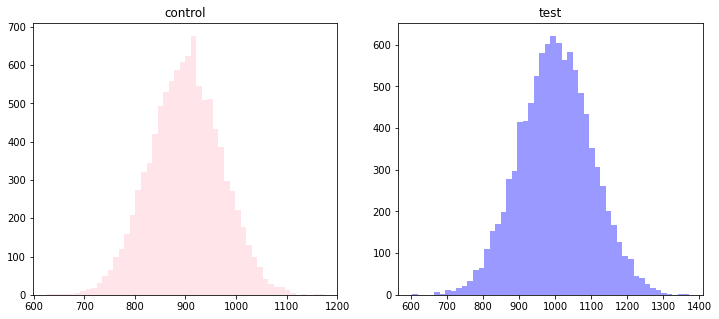

In [8]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(ex_2,color = 'pink',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(ex_1,color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title('test')

Как вы думаете, какое значение суммы оплаты встречается чаще всего в группах? а какое или какие реже всего?

Несложно заметить, что значения, равные среднему значению в группах будут встречаться чаще всего (что в целом логично, учитывая что у нас еще и распределение нормальное), а значения в хвостах - реже всего. Соответвенно, когда мы получаем разность наших значений (то что делали выше для определения критических областей), то ситуация будет похожа, мы получим много одинаковых или близких друг к другу разностей и редко встречающиеся разности значений, которые находятся в хвостах.

<AxesSubplot:>

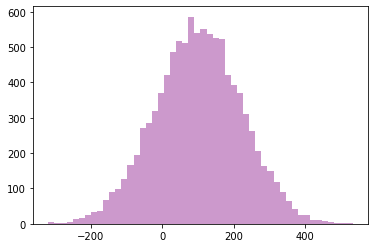

In [9]:
sns.distplot(diff,color = 'purple',hist = True, kde = False)

Таким образом, несложно определить, что у каждого значения в исходных выборках, есть вероятность, с которой мы можем его встретить, а также и у распределения статисики нашего критерия также есть вероятность возникновения разных значений. **И по мере того, как наша разность средних удаляется от истинной разности средних - падает и частота вречаний таких значений и соответственно вероятность появления такой разности и значений среднего, которые к такой разности могут привести**

Это все очень логично, а теперь вспомним несколько знакомых нам определений из теории вероятностей, которые это подтверждают и помогают нам в расчете p- value)

#### 4.2.4.1 Кyмулятивная функция распределения (CDF) и плотность вероятности (PDF)

**Функция плотности вероятности (Probability Density Function, PDF)** . Эта функция показывает распределение целевых значений. Для количественных целевых значений она позволяет определять вероятность того, что они находятся в данной области. 

<AxesSubplot:ylabel='Density'>

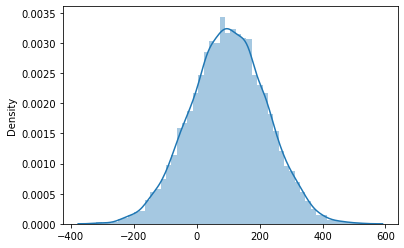

In [10]:
sns.distplot(diff)

**Кумулятивная функция распределения (CDF)** дает интегральную картину распределения вероятности. Она рассматривает функцию вероятностной меры и отвечает на вопрос: «Какова вероятность того, что результат окажется меньше или равен такому-то?», то есть  является вероятностью того, что X примет значение , меньшее или равное х.

**Кумулятивная функция распределения показывает вероятность того, что целевое значение меньше указанного значения либо равно ему**

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

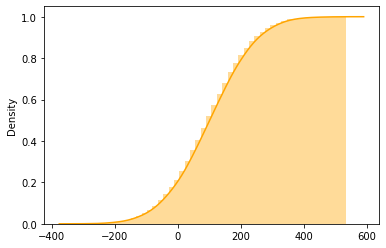

In [11]:
kwargs = {'cumulative': True}
sns.distplot(diff, hist = True,hist_kws=kwargs, kde_kws=kwargs, color = 'orange')

А теперь соберем вместе наши знания об уровне значимости, критической области и вот этом всем!
Разница наших средних распределена нормально, значит давайте подумаем,какова вероятность что любое значение из выборки будет меньше или равно нашему среднему значению? Конечно же 0.5. 

In [12]:
stats.norm.cdf(np.mean(diff),np.mean(diff),np.std(diff))

0.5

In [13]:
stats.norm.cdf(max(diff),np.mean(diff),np.std(diff))

0.9998251768754346

In [14]:
stats.norm.cdf(200,np.mean(diff),np.std(diff))

0.7941845205745763

На самом деле, давайте рассмотрим это с точки зрения проверки гипотезы. Мы проверяем, что наша разность средних имеет значение меньше 400.
в таком случае:
* нулевая гипотеза говорит нам - разность среднего значимо не различается со значением 400
* альтернативная - разность средних значимо меньше чем 400

Зададим уровень значимости - 0.05,например. То есть мы отвергнем нулевую гипотезу и будем считать что разность средних меньше 400, если получим значение p - value < 0.05. А что это значит? Вспомним, что p -value - вероятность ошибки первого рода, то есть в нашем случае это вероятность посчитать, что разница средних больше или равна 400 при условии, что это не так.

Мы узнали что кумулятивная функция распределения позволяет нам найти вероятность того, что значение МЕНЬШЕ ИЛИ РАВНО определенному значению в распределении, значит вот так:

In [15]:
stats.norm.cdf(400,np.mean(diff),np.std(diff))

0.9933320194472118

Мы получили вероятность того, что значения в нашем распределении разности средних меньше или равны 400. Если посмотрим на распределение, то поймем почему, все наши значения меньше чем 400, 400 - это максимум (ну или близко к нему).

Теперь подумаем, как мы можем найти вероятность того, что разность средних действительно равна или больше 400? Очень просто, 1 - вероятность того, что значение меньше 400

In [16]:
p_val = 1 - stats.norm.cdf(400,np.mean(diff),np.std(diff))
if p_val > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что разность средних значимо не отличается от заданного значения','\np-value = ',p_val)
else:
     print('Не можем принять нулевую гипотезу о том, что разность средних значимо не отличается от заданного значения','\np-value = ',p_val)


Не можем принять нулевую гипотезу о том, что разность средних значимо не отличается от заданного значения 
p-value =  0.006667980552788166


**Вопросы** 
* 1) а если бы проверяли такую гипотезу относительно реального среднего, что бы было? 
* 2) Проверьте правостороннюю гипотезу (то есть что разница наших средних больше какого-то значения)

Таким образом, каждый раз, когда мы проверяем какую-либо гипотезу, мы работаем с критическим областями распределения статистики критерия (в нашем случае это была разность средних) и задаем вероятность ошибки первого рода. Например в нашем случае,если бы мы задали значение очень близкое к реальной разности среднего, то могли бы получить справедливость нулевой гипотезы о том, что значение значимо не отличается от реальной разности среднего. Насколько близкое должно быть значение определяет как раз таки наш уровень значимости. То есть мы допускаем определенную вероятность совершения ошибки, так как значение среднего все равно будет довольно таки близко к реальному.

# 5  Статистические критерии

**Статистический критерий** — строгое математическое правило, по которому принимается или отвергается та или иная статистическая гипотеза с известным уровнем значимости. Построение критерия представляет собой выбор подходящей функции от результатов наблюдений (ряда эмпирически полученных значений признака), которая служит для выявления меры расхождения между эмпирическими значениями и гипотетическими.

![cr](https://i.pinimg.com/originals/ff/61/6d/ff616dc22fe8e2418be1fd7a175b2461.png)

С помощью статистического критерия мы рассчитываем, так называемую статистику критерия, в рассматриваемом нами долго примере про средние чеки групп мы решили взять разность средних, однако мы не проверяли гипотез при помощи каких-либо критериев. У каждого критерия есть свой способ расчета статистики критерия, с которой мы в последствии работаем.

Выбор статистического критерия, как всем известно, в первую очередь зависит от распределения и вида данных, затем от зависимости групп и их количества.

![choose](https://lit-review.ru/wp-content/uploads/2018/04/vibor_stat_kriteria-1024x774.png)

Все критерии различий условно подразделены на две группы: параметрические и непараметрические критерии.

Критерий различия называют параметрическим, если он основан на конкретном типе распределения генеральной совокупности (как правило, нормальном) или использует параметры этой совокупности (средние, дисперсии и т.д.).

Критерий различия называют непараметрическим, если он не базируется на предположении о типе распределения генеральной совокупности и не использует параметры этой совокупности. Поэтому для непараметрических критериев предлагается также использовать такой термин как «критерий, свободный от распределения».

При нормальном распределении генеральной совокупности параметрические критерии обладают большей мощностью по сравнению с непараметрическими. Иными словами, они спо­собны с большей достоверностью отвергать нулевую гипотезу, если последняя неверна. По этой причине в тех случаях, когда выборки взяты из нормально распределенных генеральных со­вокупностей, следует отдавать предпочтение параметрическим критериям.

# 6 Этапы проверки статистической гипотезы
* Формулирование нулевой и альтернативной гипотезы;
* Выбор статистического критерия
* Определение уровня значимости;
* Расчет статистики критерия и/или p - value;
* Интепретация результатов

# 7 Проверка гипотезы с помощью t-критерия Стьюдента

## 7.1 t-критерий Стьюдента для несвязных выборок

**В общем виде критерий Стьюдента равняется отношению разности выборочных средних к стандартной ошибке разности средних**

![st](https://i.pinimg.com/originals/38/39/58/383958ca7ad8b647440bf3921ac2b6ad.png)

*Let's practice!*

Мы работаем в агрегаторе такси (да,да,опять). И провели эксперимент в ходе которого для одной группы пользователей мы выводили доступные для применения промокоды, а для другой нет. В качестве метрики мы выбрали среднюю конверсию в заказ. Данные сгенерированы, но близки к реальности)
* ***Полученные данные***

In [17]:
test = pd.read_csv('v2o_test.csv')

In [18]:
test.head()

,Unnamed: 0,a_v20,b_v20
0,0,0.413052,0.448365
1,1,0.414768,0.381886
2,2,0.319243,0.553435
3,3,0.277081,0.440907
4,4,0.206107,0.421434


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

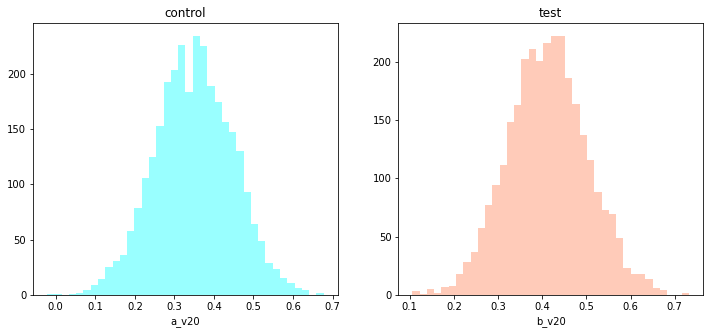

In [19]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(test['a_v20'],color = 'cyan',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(test['b_v20'],color = 'coral',hist = True, kde = False,ax=ax)
ax.set_title('test')

**Проверим данные на нормальность**

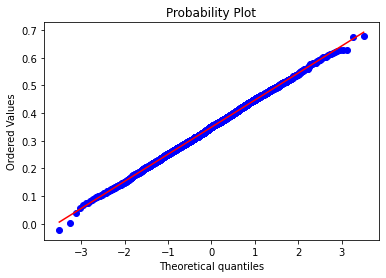

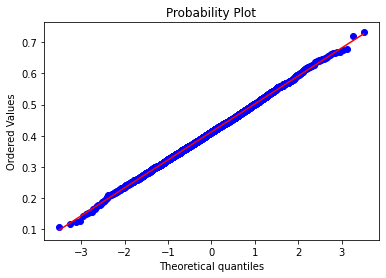

In [20]:
stats.probplot(test['a_v20'], dist="norm", plot=plt)
plt.show()

stats.probplot(test['b_v20'], dist="norm", plot=plt)
plt.show()


In [21]:
groups = [test['a_v20'],test['b_v20']]

In [22]:
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Normal W= 0.9996 p-value 0.8637
Normal W= 0.9995 p-value 0.6834


**Сформулируем гипотезу**

 Чего мы ожидаем? Конечно, мы ожидаем что средняя конверсия в заказ в тестовой группе будет выше. Но! Какой исход нас волнует? На самлм деле для нас важно понять, стала ли средняя конверсия в заказ выше или ниже. Поэтому мы формулируем двустороннюю гипотезу! 

* H0 - средние конверсии в заказ в группах не имют значимых различий;
* H1 - средние конверсии в заказ имеют значимые различия

Что дальше? Определим уровень значимости.
* Берем a = 0.05

Критерий Стьюдента для расчета значения статистики критерия оперирует таким понятием как степени свободы.

***Число степений свободы*** - это число свободно варьирующихся элементов в составе выборки. То есть число элементов, через которое мы можем выразить выбранное из ряда значение, зная объем выборки и среднее.
* Например: у нас есть ряд a = 2,4,6,8,10. Его среднее арифметическое = 6. Количество элементов = 5. Любой элемент может быть выражен через выражение: *n * a_среднее - sum(a)*.

Проверим:
выразим последний элемент,равный 10 через среднее и все остальные элементы: *6 * 5 - 2 + 4 + 6 + 8 = 30 - 20 = 10*

Таким образом, количество степеней свободы  - количество чисел, которые мы имеем, чтобы выразить любой элемент через его среднее.
По классике обозначается как ***Размер выборки - 1*** 

**Рассчитаем статистику критерия Стьюдента**

Вычислим сами средние конверсии, раз уж мы сравниваем их

In [23]:
mean_a = np.mean(test['a_v20'])
mean_b = np.mean(test['b_v20'])
print('Средняя конверсия в заказ в контрольной группе = ',mean_a)
print('Средняя конверсия в заказ в тестовой группе = ',mean_b)

Средняя конверсия в заказ в контрольной группе =  0.34935236670203085
Средняя конверсия в заказ в тестовой группе =  0.41237809369818207


Дальше нам надо вычислить их разность, разницу берем по модулю без учета знака

In [24]:
mean_diff = mean_a - mean_b
print('Разница выборочных средних = ',mean_diff)

Разница выборочных средних =  -0.06302572699615122


Дальше вычисляем стандартную ошибку разности выборочных средних. Из прошлой лекции мы знаем, что это такое и какой смысл в расчете этого значения.

In [25]:
#количество элементов в выборках
n1 = len(test['a_v20'])
n2 = len(test['b_v20'])

#дисперсии
var_a = np.var(test['a_v20'],ddof = 1)
var_b = np.var(test['b_v20'],ddof = 1)

#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

#стандартная ошибка разности средних
sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)

print('Стандартная ошибка разности средних = ',sem)

Стандартная ошибка разности средних =  0.0024259084942340387


Получим статистику критерия

In [26]:
t = mean_diff/sem
print('t-критерий =',t)

t-критерий = -25.98025735346258


Получим p-value

In [27]:
#степени свободы
df = (n1 + n2) - 2

#p - value
p = stats.t.cdf(t, df) * 2

if p > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)

Есть статистически значимая разница 
t - критерий =  -25.98025735346258 
p-value = 4.142263644207472e-141


Тоже самое с помощью scipy)

In [28]:
t2, p2 = stats.ttest_ind(test['a_v20'],test['b_v20'])


if p2 > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t2,'\np-value =',p2)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t2,'\np-value =',p2)

Есть статистически значимая разница 
t - критерий =  -25.98025735346258 
p-value = 4.142263644207472e-141


## 7.2  Непараметрический критерий Манна - Уитни

Мы увидели, что отображение промокодов дало значимый результат на конверсию в заказ и решили провести тест и узнать как же это повлияло на оплаты клиентов)

In [29]:
df = pd.read_csv('test_avg_money.csv')

In [30]:
df.head()

,a,b
0,414,510
1,122,592
2,722,293
3,193,561
4,636,317


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

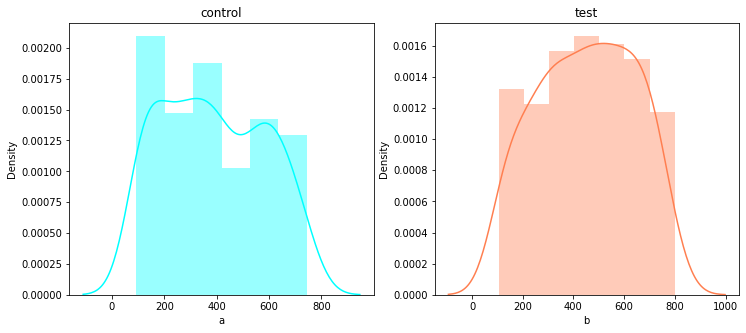

In [31]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df['a'],color = 'cyan',hist = True,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(df['b'],color = 'coral',hist = True,ax=ax)
ax.set_title('test')

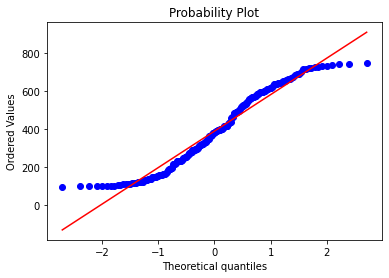

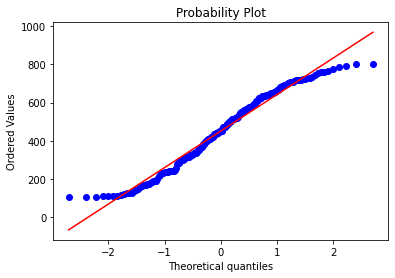

In [32]:
stats.probplot(df['a'], dist="norm", plot=plt)
plt.show()

stats.probplot(df['b'], dist="norm", plot=plt)
plt.show()

In [33]:
groups = [df['a'],df['b']]

In [34]:
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Not normal W= 0.9457 p-value 0.0
Not normal W= 0.9651 p-value 0.0001


Наши денежки распределены не нормально. Как мы помним с прошлой лекции, это не критично. С таким мы тоже умеем работать.
Один из популярных методов сравнения в двух независимых группах - критерий Манна-Уитни.

**Критерий Манна-Уитни** представляет непараметрическую альтернативу t-критерия для независимых выборок. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале. Относится к ранговым критериям.

Интерпретация теста по существу похожа на интерпретацию результатов t-критерия для независимых выборок, за исключением того, что U критерий вычисляется, как сумма индикаторов попарного сравнения элементов первой выборки с элементами второй выборки. U критерий - наиболее мощная (чувствительная) непараметрическая альтернатива t-критерия для независимых выборок; фактически, в некоторых случаях он имеет даже большую мощность, чем t-критерий.

Алгоритм расчета критерия прост и интуитивно понятен

**Важная поправка** при больших значениях выборки распределение U-критерия быстро сходится к нормальному распределению, поэтому для интерпретации рассчитывается z-значение, если количество элементов в выборках больше 60. У нас больше)))

***Формула для расчета U-критерия (статистики теста):***

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

Также можем рассчитать через сравнение двух U критериев для наших выборок, результат будет одинаков

![u2](https://i.pinimg.com/564x/af/24/80/af2480cefddd060cc241b8e4cf73a9b9.jpg)

Всюду видим упоминание рангов. И правда,чтобы рассчитать критерий Манна-Уитни нам сначала нужно получить ранги наших значений, потому что если просто сказать о сути критерия, то мы получаем суммы рангов в наших группах и затем сравниваем между собой эти суммы эти рангов. таким образом, мы и правда не привязываемся к параметрам распределения, как в случае с критерием Стьюдента.Начнем)

***Из двух выборок получим одну,отсортируем и затем расставим ранги**. Максимальное значение в группе имеет первый ранг и так далее.

In [35]:
df.head()

,a,b
0,414,510
1,122,592
2,722,293
3,193,561
4,636,317


In [36]:
len(df)

206

In [37]:
df1 = df.stack().reset_index(-1).iloc[:, ::-1]
df1.columns = ['value', 'group']
df1

,value,group
0,414,a
0,510,b
1,122,a
1,592,b
2,722,a
...,...,...
203,429,b
204,217,a
204,328,b
205,691,a


In [38]:
df1['rank'] = df1['value'].rank(ascending = False, numeric_only = True)#пояснитть

In [39]:
df1.head()

,value,group,rank
0,414,a,206.0
0,510,b,154.0
1,122,a,383.5
1,592,b,100.0
2,722,a,24.5


Дальше необходимо вычислить сумму рангов

In [40]:
df1.groupby('group')['rank'].sum()

group
a    46434.0
b    38644.0
Name: rank, dtype: float64

In [41]:
a = df1[df1['group'] == 'a']['value']
b = df1[df1['group'] == 'b']['value']
rank_a = df1[df1['group'] == 'a']['rank'].sum()
rank_b = df1[df1['group'] == 'b']['rank'].sum()

Ну и в в целом у нас все есть, чтобы вычислить U-критерий)

![u](https://i.pinimg.com/564x/7f/40/70/7f407010828abd65c1602e0472a8a096.jpg)

In [42]:
def U(a,b,rank_a,rank_b):
    number_of_values_a = a.count()
    number_of_values_b = b.count()
    all_values = number_of_values_a * number_of_values_b
    max_rank = max(rank_a,rank_b)
    max_count = float()
    if rank_a > rank_b:
        max_count = number_of_values_a
    else:
        max_count = number_of_values_b
    return (all_values + (max_count * (max_count + 1))/2) - max_rank

In [43]:
print('U-критерий =',U(a,b,rank_a,rank_b))

U-критерий = 17323.0


Второй чуть способ суть быстрее,но даст тот же результат)

![u2](https://i.pinimg.com/564x/af/24/80/af2480cefddd060cc241b8e4cf73a9b9.jpg)

In [44]:
def U2 (a,b,rank_a,rank_b):
    return min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))

In [45]:
print('U-критерий =',U2(a,b,rank_a,rank_b))

U-критерий = 17323.0


Теперь это надо как-то интерпретировать и вывести p-value. Выше упоминали, что при размере выборки > 60, мы уже не можем посмотреть в табоицу критических значений + распределение U-критерия отлично сходится к нормальному, поэтому мы рассчитываем z-значение для нашего U-критерия и по нему получаем наш заветный p-value и результат.

***Z - значение*** - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения. Это безразмерный статистический показатель используемый для сравнения значений разной размерности или шкалой измерений.

<img width = '1000px' src= https://i.pinimg.com/originals/9f/b5/36/9fb536c3c368b01f17b4231c4b842951.png>

In [46]:
def z_score(a,b):
    m_u = (a.count()*b.count())/2 + 0.5
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+b.count()+1)/12)
    return (U(a,b,rank_a,rank_b) - m_u)/sigma_u

In [47]:
print('z-значение = ',z_score(a,b))

z-значение =  -3.2233805832262994


In [48]:
round(stats.norm.cdf(z_score(a,b)) * 2.0,4)

0.0013

соберем вместе

In [49]:
def MannWhitney(a,b,rank_a,rank_b):
    U = min((rank_a - (a.count() * (a.count() + 1))/2),(rank_b - (b.count() * (b.count() + 1))/2))
    m_u = (a.count()*b.count())/2
    sigma_u = np.sqrt((a.count()*b.count())*(a.count()+ b.count()+1)/12)
    z_score = (U - m_u)/sigma_u
    p_val = stats.norm.cdf(z_score) * 2
    if p_val > 0.05:
        print('Нет статистически значимой разницы и оснований отвергнуть гипотезу H0','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
    else:
        print('Есть статистически значимая разница, гипотеза H0 отвергается','\nU-критерий:',U,
              '\nz_score',z_score,'\np-value',round(p_val,4))
        return

In [50]:
MannWhitney(a,b,rank_a,rank_b)

Есть статистически значимая разница, гипотеза H0 отвергается 
U-критерий: 17323.0 
z_score -3.2229668519231 
p-value 0.0013


Тоже самое с помощью scipy))

In [51]:
stat, p_val = stats.mannwhitneyu(a,b,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Разница статистически значима 
p-value 0.0013 
U-критерий 17323.0


## 7.3 Эффективное сравнение конверсий/долей. Критерий Хи-квадрат Пирсона

Критерий Хи-квадарт позволяет нам сравнить отношения количества успеха к неуспехам в двух таблицах.Под успешным можем подразумевать не толькол совершение действия, но и любое желаемое число, например можем сравнить доли успешно закрытых заказов, доли женщин студентов от всей группы и так далее. Позволяет сравнивать больше чем два значения и довольно таки эффективно.

Суть теста - сравнить конверсии в успешное закрытие заказа. Давайте вместе сформулируем гипотезы)

In [52]:
data = pd.read_csv('conversion_test.csv')

In [53]:
data.head()

,Order,group,status
0,1,1,0
1,2,1,0
2,3,1,1
3,4,1,1
4,5,1,0


Критерий хи-квадарт вычисляем по формуле:

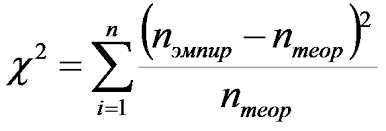

Эмпимрические значения - это те значения, которые мы получили на практике, в нашем случае это нашит реальные конверсии в заказ, а теоретические, это те конверсии, которые бы мы получили, если бы была верна нулевая гипотеза об отсутствии значимого различия, то есть они должны быть равны.

Если сравниваем 2 группы, то нужно не забыть про поправку Йетса:

Использование хи-квадрат распределение интерпретировать хи-квадрат статистики Пирсона требует, чтобы предположить , что дискретная вероятность наблюдаемых биномиальных частот в таблице может быть приближена непрерывной распределения хи-квадрат . Это предположение не совсем правильно, и вводит некоторую погрешность.

Для того, чтобы уменьшить погрешность в приближении Франк Йейтс , английский статистик , предложил поправку на непрерывность , которая регулирует формулу для хи-квадрат тест Пирсона путем вычитания 0,5 из разницы между каждой наблюдаемой величиной и его ожидаемого значения в таблице 2 × 2 на случай чрезвычайных ситуаций , Это уменьшает хи-квадрат значение , полученное и тем самым увеличивает ее p -value

Подробнее - https://ru.qwe.wiki/wiki/Yates's_correction_for_continuity

![y](https://i.pinimg.com/564x/21/1c/f6/211cf639d8948d5a0df3d63beca311d2.jpg)

Если мы сравниваем больше 2-х значений, то есть таблица сопряженности не 2на2, то вводить поправку Йетса не нужно

***Составляем таблицу сопряженности***

Таблица сопряжённости, или таблица контингентности, факторная таблица в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона.

Подробнее о структуре таких таблиц - https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8

In [54]:
table = pd.crosstab(
    data['group'],
    data['status'],
    margins = True
)
table

table1 = pd.crosstab(
    data['group'],
    data['status']
)
table

status,0,1,All
group,,,
0,189,189,378
1,186,190,376
All,375,379,754


In [55]:
def Chisq(table):
    expected = []
    obs1 = np.append(table.iloc[0][0:2].values, table.iloc[1][0:2].values)
    rows = table.iloc[0:2,2].values
    cols = table.iloc[2,0:2].values
    total = table.loc['All','All']
    for count in range(2):
        for column in cols:
            expected.append((column*rows[count])/total)
    obs = obs1 + 0.5 * np.sign(expected - obs1)
    return sum(((obs - expected)**2)/expected)

**degrees of freedom:** (rows - 1) * (cols - 1)
* в нашем случае: (2-1) * (2-1) = 1 * 1 = 1


In [56]:
Chisq(table)

0.005361664602799366

In [57]:
1 - stats.chi2.cdf(Chisq(table),1)

0.9416283551235602

In [58]:
p_value = 1 - stats.chi2.cdf(Chisq(table),1)

if p_value > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия', '\nХи-квадрат критерий=',Chisq(table),'\np-value = ',p_value)
else:
    print('Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия','\nХи-квадрат критерий=',Chisq(table),'\np-value = ',p_value)

Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия 
Хи-квадрат критерий= 0.005361664602799366 
p-value =  0.9416283551235602


In [59]:
stat = stats.chi2_contingency(table1)

In [60]:
table1

status,0,1
group,,
0,189,189
1,186,190


In [61]:
stat = stats.chi2_contingency(table1)
if stat[1] > 0.001:
    print('p-value =',stat[1],'\nchi stat = ',stat[0],'\nнет значимой разницы')
else:
    print('p-value =',stat[1],'\nchi stat = ',stat[0],'\nесть значимая разница')

p-value = 0.9416283551235602 
chi stat =  0.005361664602799366 
нет значимой разницы
